# 2.3 Filtres Thresholds i Blobs
Image segmentation o segmentació d’imatges és una tècnica de visió per computador on les imatges digitals són segmentades o dividides en múltiples segments o parts de manera iterativa fins que arribem a aïllar regions o objectes d’interès.

En general, els algoritmes de segmentació es basen en un d’aquests dos conceptes:
-   Discontinuïtat: es divideix la imatge detectant canvis bruscos de nivell de color. Exemple: detecció de punts, detecció de línies, detecció de vores.
-   Similitud: es divideix la imatge detectant grups de píxels o zones que tinguin el valors similars (segons algun criteri fixat).
 
L’objectiu final sempre és simplificar la imatge original, ja sigui per detectar de manera automàtica algunes característiques (contorns, localització d’algun objecte concret, etc.), com per transformar la imatge en alguna representació més senzilla que permeti visualitzar informació que d’altra manera no es veuria (com per exemple en algunes imatges mèdiques).

## Filtres Threshold
El Thresholding és el mètode més simple de Image Segmentation. Threshold, en anglès, vol dir llindar, així que aquest mètode el que fa és aplicar llindars als valors dels elements de la matriu representativa de la imatge.

Hem dit que segmentar volia dir separar o aïllar aquella o aquelles parts de la imatge que volem estudiar, doncs bé, en el thresholding apliquem un valor que defineix el llindar; els píxels amb intensitat superior al llindar seran rebutjats o acceptats (segons l'objectiu que busquem).

Comencem amb un exemple pràctic que ens ho farà entendre més ràpid: convertir una imatge en escala de grisos en una imatge binària.

### Binarització d'imatges
Una imatge binària només pot tenir dos tipus de valors en cada element de la matriu: 0 (negre) o 1 (blanc). Així doncs per convertir una imatge en escala de grisos on cada element de la matriu pot tenir 256 valors diferents (rang 0-255), només hem de definir un llindar dins del rang 0-255 a partir del qual el valor final serà blanc o negre (el que vulguem decidir).

Anem a provar diferents llindars per veure la diferència.

In [11]:
# com que tenim la funció threshold en OpenCV la fem servir. Podem fer servir interrogant per mostrar la
# documentació d'una funció (Docstring)
import cv2

?cv2.threshold

Docstring:
threshold(src, thresh, maxval, type[, dst]) -> retval, dst
.   @brief Applies a fixed-level threshold to each array element.
.   
.   The function applies fixed-level thresholding to a multiple-channel array. The function is typically
.   used to get a bi-level (binary) image out of a grayscale image ( #compare could be also used for
.   this purpose) or for removing a noise, that is, filtering out pixels with too small or too large
.   values. There are several types of thresholding supported by the function. They are determined by
.   type parameter.
.   
.   Also, the special values #THRESH_OTSU or #THRESH_TRIANGLE may be combined with one of the
.   above values. In these cases, the function determines the optimal threshold value using the Otsu's
.   or Triangle algorithm and uses it instead of the specified thresh.
.   
.   @note Currently, the Otsu's and Triangle methods are implemented only for 8-bit single-channel images.
.   
.   @param src input array (multiple-cha

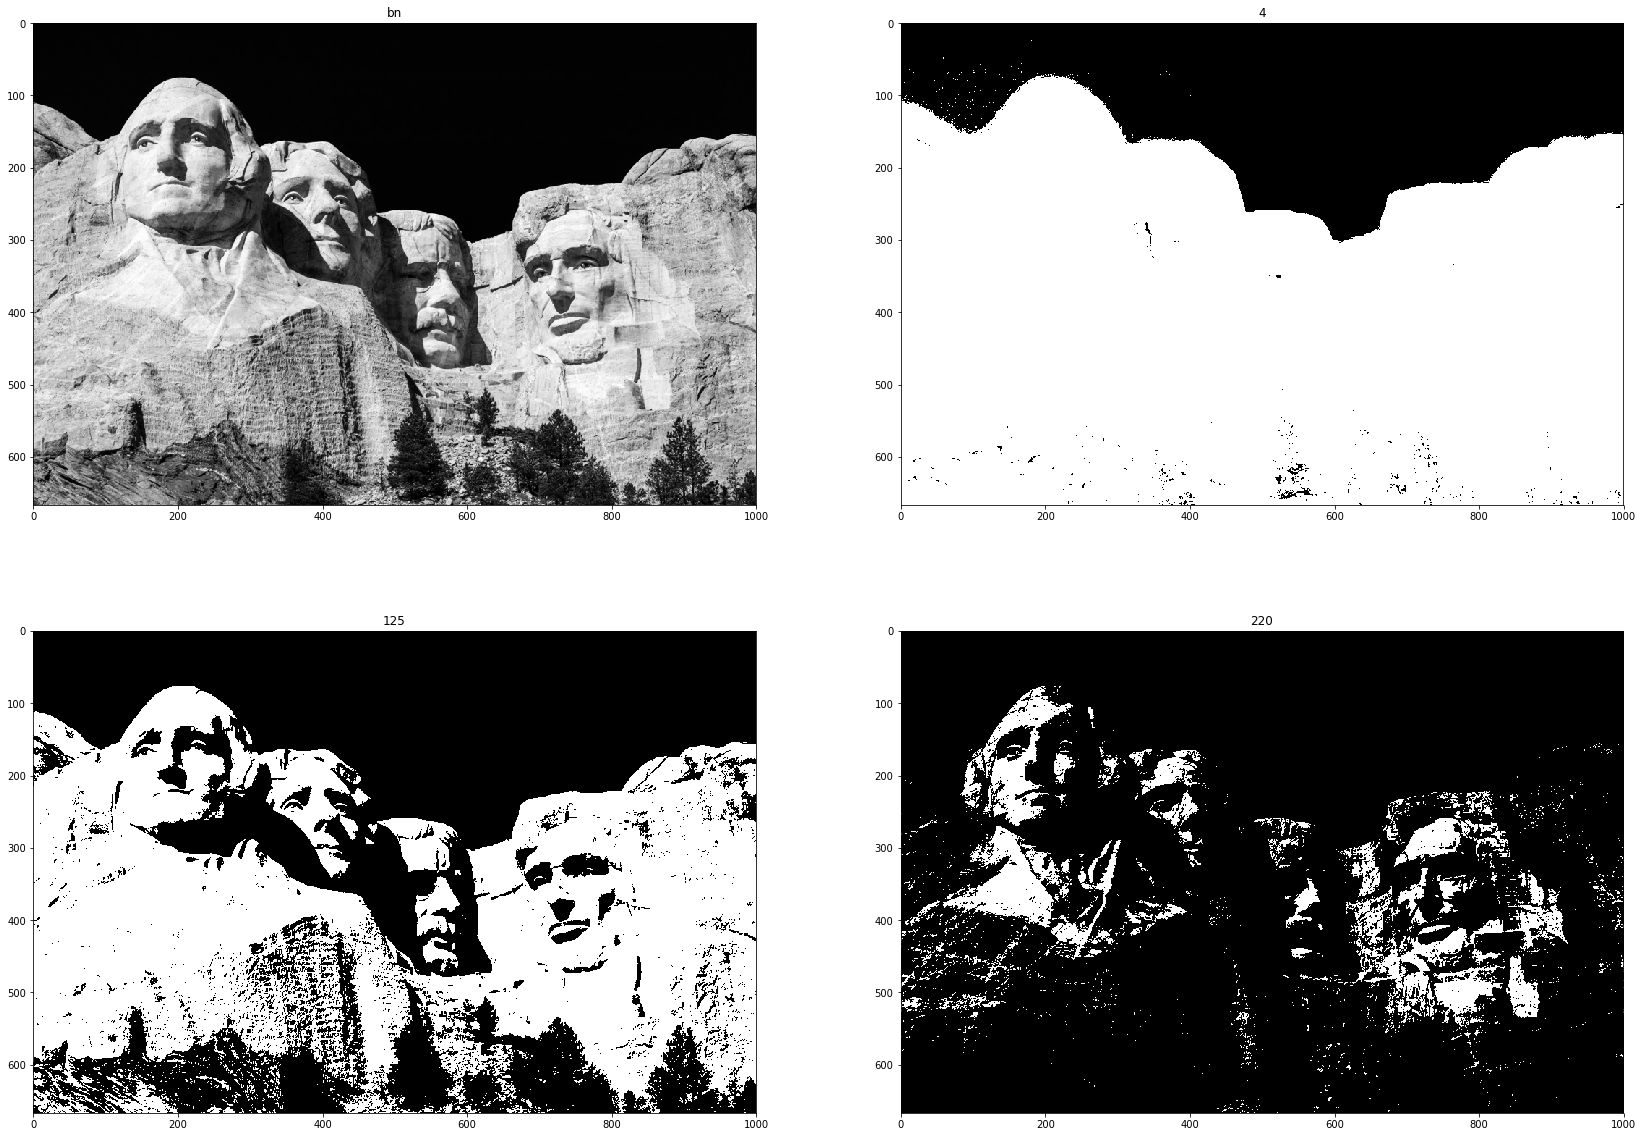

In [12]:
#EXEMPLE PRÀCTIC: BINARITZACIÓ IMATGE EN ESCALA DE GRISOS FENT SERVIR 3 NIVELLS DIFERENTS DE LLINDAR
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('Imatges/Mount_Rushmore_National_Memorial.jpg')
# Photo by Brandon Mowinkel on Unsplash

r, im20 = cv2.threshold(im, 4, 255, cv2.THRESH_BINARY)
r, im125 = cv2.threshold(im, 125, 255, cv2.THRESH_BINARY)
r, im200 = cv2.threshold(im, 220, 255, cv2.THRESH_BINARY)

plt.subplot(2,2,1)
plt.imshow(im)
plt.title('bn')
plt.subplot(2,2,2)
plt.imshow(im20)
plt.title('4')
plt.subplot(2,2,3)
plt.imshow(im125)
plt.title('125')
plt.subplot(2,2,4)
plt.imshow(im200)
plt.title('220')

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(28.5, 20.5)




La funció cv::threshold permet diferents tipus de filtratge per llindar gràcies al 5è paràmetre:

````
double cv::threshold(
   cv::InputArray src,  // Imatge entrada
   cv::OutputArray dst, // Imatge resultant
   double thresh,       // Valor del llindar
   double maxValue,     // Màxim valor
   int thresholdType    // TIPUS OPERACIÓ DE FILTRATGE PER LLINDAR
);
````

Hem fet servir el tipus de Threshold més comú (THRESH_BINARY), però us animem a que experimenteu què passa amb una mateixa imatge si fem servir els mateixos valors però amb tipus o mètodes de Threshold diferents; per exemple, podeu provar com aconseguir que tots els valors majors que el valor de llindar tinguin el mateix valor del llindar enlloc del valor màxim del rang, o com invertir la imatge que hem fet servir en l'exemple anterior.

### Histograma d'imatges
Com hem vist el filtratge per llindar és molt fàcil d'entendre i d'aplicar, la seva dificultat recau en trobar el valor del llindar que més s'ajusti a les nostres necessitats. Però què passaria si tinguéssim una manera _automàtica_ de trobar alguns llindars? Aquí entren en joc l'**histograma**.

L'histograma és una gràfica que mostra quants píxels hi ha de cada nivell de gris en una imatge. Així si tenim una imatge de grisos amb valors en el rang 0-255, l'eix d'axis X mostrarà els valors de gris 0-255, mentre que l'axis Y mostrarà la quantitat de píxels per cada valor de gris. Mireu un exemple original del web [Cambridge in Color website](https://www.cambridgeincolour.com/tutorials/histograms1.htm):

![](Imatges/histogram_sample.jpg)

En la imatge veiem que els valors no estan uniformement distribuits, sino que la majoria s'agrupen a l'esquerra de la gràfica (colors menys lluminosos, més ombres) i a la dreta (color més brillants o ressaltats).

Els histogrames ens donen una visió de la distribució del color i la intensitat d'una imatge. Es fan servir molt per millorar el contrast o la brillantor d'imatges de manera automàtica en els softwares d'edició d'imatge, per exemple, si es detecta que una imatge té la majoria dels valors a la dreta de l'histograma (imatge sobre-exposada), o a l'esquerra de l'histograma (imatge sub-exposada), es poden repartir els valors d'aquesta regió entre tot el rang de l'axis X per corregir-ho. Això es coneix com equalització de l'histograma.

I també es poden fer servir per detectar o escollir el millor valor per fer servir com llindar en un mètode de Thresholding; veiem un exemple on ens permetrà separar un objecte del fons de la imatge.

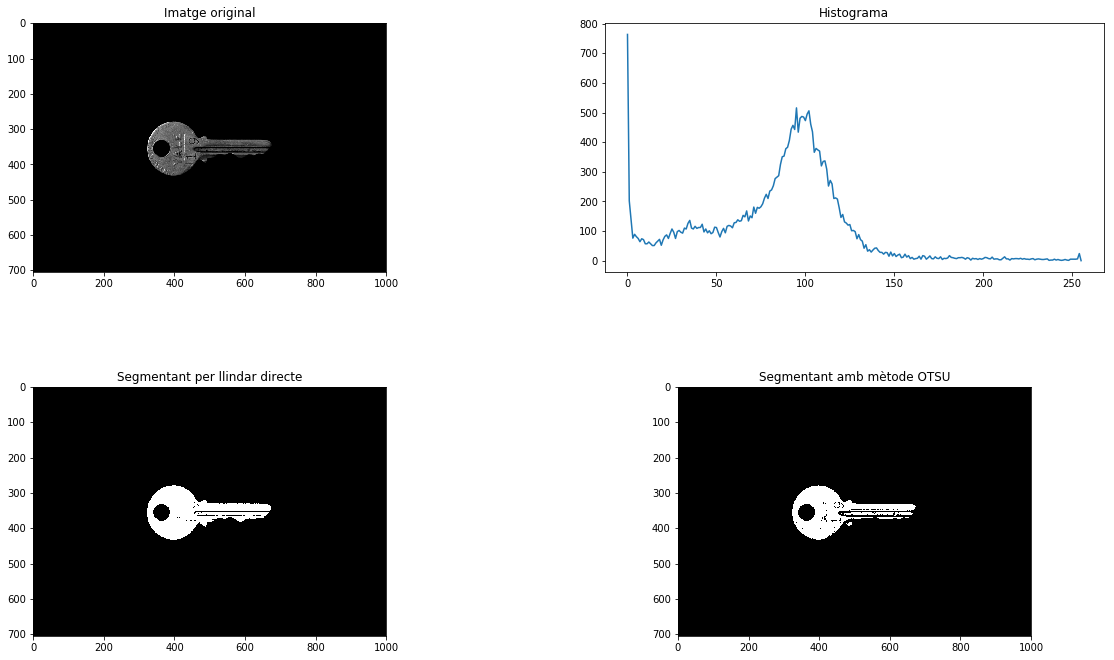

In [6]:
# EXEMPLE PRÀCTIC: Com calcular l'histograma per escollir el valor més adequat de binarització?
# Suposem que volem detectar la clau. Clarament es veu que amb un threshold podem segmentar-la del fons,
# com escollir el valor més adient de binarització?
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('Imatges/Clau.jpg', cv2.IMREAD_GRAYSCALE)
# Clau/Key Photo by Matt Artz on Unsplash
plt.subplot(2,2,1)
plt.imshow(im,cmap='gray')
plt.title("Imatge original")
# calculant l'histograma podrem treure el valor més adient de binarització
hist = cv2.calcHist([im],[0],None,[256],[0,256])
# calculem l'histograma entre 1 i 256 (excloem els 0's)
# aixo ho fem pq la imatge té un fons negre que domina tot l'histograma i no podrem veure la distribucio de nivells de gris
hist_1 = cv2.calcHist([im],[0],None,[256],[1,256])

#plt.subplot(1,4,1)
#plt.subplot(3,2,3)
#plt.plot(hist)
#plt.subplot(1,4,2)
plt.subplot(2,2,2)
plt.plot(hist_1)
plt.title("Histograma")

# un cop veiem l'histograma, veiem que al voltant del valor 20 podem segmentar la clau del fons
r, im_t = cv2.threshold(im, 20, 255, cv2.THRESH_BINARY)
#plt.subplot(1,4,3)
plt.subplot(2,2,3)
plt.imshow(im_t, cmap='gray')
plt.title("Segmentant per llindar directe")

# el mètode d'OTSU escull automàticament el valor de binarització amb un algoritme que mira l'histograma
# i intenta trobar el valor que minimitza la variança intra classes:
# més informació a: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
ret2,im_otsu = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#plt.subplot(1,4,4)
plt.subplot(2,2,4)
plt.imshow(im_otsu, cmap='gray')
plt.title("Segmentant amb mètode OTSU")
plt.tight_layout()

# mostrem la figura més gran per veure les imatges
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)




### Adaptative Thresholding
La separació o segmentació d'objectes del fons de la imatge (com hem fet en l'exemple de la clau) només funciona quan el color de fons de la imatge o la il·lumincació de l'escena és uniforme, però quan la imatge no té aquestes característiques el millor és aplicar una tècnica anomenada Adaptative Thesholding o Filtratge per Llindar Adaptatiu o Variable.

Aquesta tècnica permet calcular el llindar a partir de les característiques locals de l'entorn que s'està avaluant, així si per exemple un objecte a segmentar té mitja part a l'ombra i mitja al sol, el llindar a aplicar serà diferent en aquestes dues parts.


In [ ]:
# EXEMPLE PRÀCTIC: Detecció objectes amb fons no uniformes utilitzant Adaptative Thresholding.
# RIQUI: FALTA BUSCAR IMATGE O FER-LA


## Blobs
Un altre mètode de segmentació d'imatges és la detecció de Blobs. Un blob és un conjunt de píxels propers que estan connectats per alguna característica en comú, és a dir, una regió contigua de la imatge que té alguna característica diferent d'altres regions veïnes, com pot ser el color o la brillantor.

Blob és l'acrònim de Binary Large OBject (objectes binaris grans). El terme gran indica que només objectes d'un cert tamany són d'interès i la resta s'acostuma a considerar soroll; per exemple 2 píxels de mateix color i intensitat que siguin diferents a la resta de píxels contigus no s'acostuma a considerar un Blob.

Hi ha diferents algoritmes que detecten Blobs en imatges binàries, la majoria processen tota la imatge píxel a píxel, des de la cantonada superior esquerra fins la cantonada inferior dreta, d'esquerra a dreta i de dalt a baix. Un d'aquests algoritmes és el conegut com "The Recursive Grass-Fire Algorithm" que ens pot ajudar a entendre com es pot processar píxel a píxel una imatge per detectar algun objecte

L'algoritme utilitza imatges binàries. Per cada píxel, l'algoritme mira si el píxel actual pot formar part d'un objecte detectable (té color blanc), i si té píxels contingus del mateix color; si és així, desa el píxel com part d'un Blob i continua amb el següent píxel. Tots els píxels contigus formen un mateix Blob, pel que si trobem un pixel blanc que no està connectat amb previs blobs, crearà un Blob nou. Al final de l'algoritme haurem detectat aquelles àrees o regions diferenciades de la resta de zones veïnes. Segons si mirem els 4 píxels contigus (píxel superior, dret, inferior, esquerra), o els 8 (incloent els que toquen amb les cantonades del píxel que estem analitzant), el Blobs detectats poden ser diferents. Les figures que mostrem a continuació mostren la diferència a l'utilitzar la connectivitat 4 o 8, a més dels tipus de Blobs/objectes que podem detectar fent servir aquest algoritme; les imatges són propietat de [The-Crankshaft Publishing’s what-when-how.com](http://what-when-how.com/) i podeu veure l'algoritme amb més detalls llegint el tutorial complet [aquí](http://what-when-how.com/introduction-to-video-and-image-processing/blob-analysis-introduction-to-video-and-image-processing-part-1/):

![]("Imatges/Blobs-what-when-how-BlobAnalysis-tmp74702_thumb_thumb.png")
Objectes/Blobs que es poden detectar amb l'algoritme The Recursive Grass-Fire Algorithm	Utilitzant conectivitat a 4 i 8 per dectecció de Blobs.

![]("Imatges/Blobs-what-when-how-BlobFigures-tmp74701_thumb.png")
Fent servir aquest algoritme podríem arribar a detectar diferentes figures blanques sobre fons negre com les que mostra la imatge anterior.

Hi ha molts altres algoritmes per detectar Blobs, ara no entrarem en detall, però sí heu de saber que openCV ja té funcions que detecten aquestes regions.


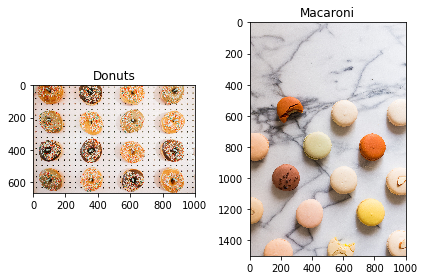

In [8]:
#EXEMPLE PRÀCTIC: DETECCIÓ BLOBS AMB SimpleBlobDetector (marcar-los amb un punt vermell al centre del Blob)
# RIQUI: POTS FER SERVIR UNA D'AQUESTES DUES IMATGES, O POT SER UNA PER L'EXEMPLE PRÀCTIC I L'ALTRE PER EXERCICI
# LA IDEA ÉS DETECTAR BLOBS I DESPRÉS PODER FILTRAR PER ALGUNA CARACTERÍSTICA COM TAMANY (PELS DONUTS) O CIRCULARITAT (PELS MACARRONI)
# Standard imports
import cv2
import numpy as np;
import matplotlib.pyplot as plt

# Read image
im = cv2.imread("Imatges/Donut_wall.jpg")
# Donut wall Photo by Marisa Morton on Unsplash
im_original = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(im_original)
plt.title("Donuts")

im2 = cv2.imread("Imatges/Mini_cookies.jpg")
# Mini cookies Photo by Erol Ahmed on Unsplash
im2_original = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,2)
plt.imshow(im2_original)
plt.title("Macaroni")
plt.tight_layout()

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


TypeError: Incorrect type of self (must be 'Feature2D' or its derivative)

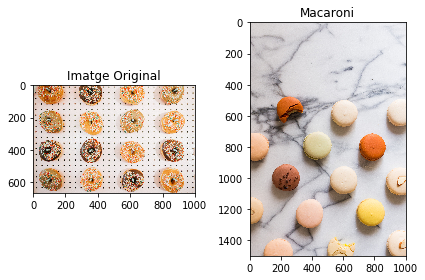

In [7]:
#EXEMPLE PRÀCTIC: DETECCIÓ BLOBS AMB SimpleBlobDetector (marcar-los amb un punt vermell al mig, al centre del Blob)
# RIQUI: ALGUNA COSA SEMBLANT A L'EXEMPLE DE SOTA, PERÒ A MI EM DONA ERROR QUE NO SE SOLUCIONAR
# EN AQUESTA PRIMERA PART FARÍEM SERVIR NOMÉS DETECCIÓ BLOBS AMB PARÀMETRES PER DEFECTE, I EN LA SEGÜENT SECCIÓ
# D'EXEMPLE PRÀCTIC EL MATEIX PERÒ FENT SERVIR PARÀMETRES DETECCIÓ CARACTERÍSTIQUES DE BLOBS COM TAMANY O CIRCULARITAT.
# Standard imports
import cv2
import numpy as np;
import matplotlib.pyplot as plt

# Read image
im = cv2.imread("Imatges/Donut_wall.jpg")
im_original = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.subplot(1,2,1)
plt.imshow(im_original)
plt.title("Imatge Original")


# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector(params)

# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs
#cv2.imshow("Keypoints", im_with_keypoints)
plt.subplot(1,2,2)
plt.imshow(im_with_keypoints)
plt.title("Blobs Detectats")

En qualsevol cas, una cosa és detectar Blobs i una altra ben diferent és identificar què és cada Blob, o quins són els Blobs que ens interessen. Per exemple, de la imatge anterior, quins Blobs són donuts i quins forats de la base?  Per aconseguir aquest objectiu haurem d'analitzar les **característiques** dels Blobs, per exemple, el tamany, o si tenen 4 cantonades per indicar que pot ser un quadrat, o si no en tenen cap i el radi és igual en totes direccions per indicar que és un cercle.

Hi ha diferents característiques dels Blobs que podem detectar amb funcions d'openCV: àrea, centre, mínima capsa de delimitació (bounding box), mínim cercle que inclogui tot el Blob, etc. Veiem-ne alguns dels més importants per la funció SimpleBlobDetector d'OpenCV:

- Àrea: És el nombre de píxels que conformen el Blob. És una característica molt utilitzada per detectar objectes d'un cert tamany. Per exemple, en la imatge dels donuts, podem fer-ho servir per diferenciar entre els donuts i els forats de la base.
- Color
- Forma: 
  - Circularitat: Valor que indica quan a prop està la forma de l'objecte a un cercle. Per exemple, un hexàgon és més proper a un cercle que un quadrat, i un quadrat és més proper al cercle una línea. 
  - Convexitat: 
  - Inertia: Com d'allargada és la forma. Per posar una escala d'exemple, de menys a més Inertia tindríem: línea, el·lipse i cercle.

Anem a mirar algun exemple pràctic.


In [ ]:
# EXEMPLE PRÀCTIC: DETECTAR BLOBS CIRCULARS D'UN CERT TAMANY 
# RIQUI: MATEIX EXEMPLE ANTERIOR PERÒ SENSE FER SERVIR PARÀMETRES PER DEFECTE, PER EXEMPLE PODEM DETECTAR
# NOMÉS RODONES DONUTS PER CIRCULARITAT I TAMANY, O BÉ NOMÉS LES COOKIES (MACARONI) SENCERES PER CIRCULARITAT


### Creant màscares de color
No volem acabar aquest capítol sense introduir-vos les màscares de color. 

Fins ara ens hem centrat en detectar objectes eliminant el fons, però ara plantegem un altre repte: detectar objectes en una imatge que tinguin un color determinat, independentment del fons. Això ho podem aconseguir utilitzant una màscara per detectar objectes.



In [ ]:
# EXEMPLE PRÀCTIC: Detecció d'objectes amb color determinat
# Introduint cvtColor i COLOR_BGR2HSV
# RIQUI: POT SERVIR PER DETECTAR OBJECTES I SECCIONS EN LA SEGÜENT SECCIÓ (per exemple detectar només objectes de color vermell en una imatge)
# RIQUI: exemple semblant aquesta web amb el llibre (https://medium.com/un-enfoque-cient%C3%ADfico-de-python/opencv-con-python-2a9b582e22cd), 
# però enlloc de entrada de video fer directament una imatge


## Referències
1. Thresholding:
 - Tutorial OpenCV per Thresholding: [https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html](https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html)
 - Umbralización en OpenCV: [http://acodigo.blogspot.com/2017/07/umbralizacion-en-opencv.html](http://acodigo.blogspot.com/2017/07/umbralizacion-en-opencv.html)
 - Adaptative Thresholding: [http://acodigo.blogspot.com/2017/08/umbralizacion-adaptativa-con-opencv.html](http://acodigo.blogspot.com/2017/08/umbralizacion-adaptativa-con-opencv.html)

2. Histogrames:
 - Tutorial OpenCV per Histogrames: [https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)
 - Camera histograms: Luminosity & Color: [https://www.cambridgeincolour.com/tutorials/histograms2.htm](https://www.cambridgeincolour.com/tutorials/histograms2.htm)
 - Equalització d'histogrames: [https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html](https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html)
 - Histogrames en OpenCV: [https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_table_of_contents_histograms/py_table_of_contents_histograms.html)
 - Histogramas OpenCV Python: [http://acodigo.blogspot.com/2017/08/histogramas-opencv-python.html](http://acodigo.blogspot.com/2017/08/histogramas-opencv-python.html)
 
3. Blobs:
 - Understanding Features:[https://docs.opencv.org/3.4.7/df/d54/tutorial_py_features_meaning.html](https://docs.opencv.org/3.4.7/df/d54/tutorial_py_features_meaning.html)
 - Feature Detection and Description: [https://docs.opencv.org/3.4.7/db/d27/tutorial_py_table_of_contents_feature2d.html](https://docs.opencv.org/3.4.7/db/d27/tutorial_py_table_of_contents_feature2d.html)
 - Blob Analysis (Introduction to Video and Image Processing) Part 1: [http://what-when-how.com/introduction-to-video-and-image-processing/blob-analysis-introduction-to-video-and-image-processing-part-1/]( http://what-when-how.com/introduction-to-video-and-image-processing/blob-analysis-introduction-to-video-and-image-processing-part-1/)
